In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def pca(X, n_components):
    """
    Perform PCA on the dataset X and return the projection matrix M.

    Parameters:
    X : numpy.ndarray
        The input data matrix of shape (n_samples, dimensionality).
    n_components : int
        The number of principal components to keep.
    
    Returns:
    X_reduced : numpy.ndarray
        The data projected onto the first n_components principal components.
    eigenvectors : numpy.ndarray
        The eigenvectors of the covariance matrix corresponding to the principal components.
    X_mean : numpy.ndarray
        The mean of the original data, used for centering.
    """
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Perform SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Select the top n_components eigenvectors
    eigenvectors = Vt[:n_components].T

    # Project the data onto the new feature space
    X_reduced = np.dot(X_centered, eigenvectors)

    return X_reduced, eigenvectors, X_mean

In [4]:
def load_train_images(folder):
    """
    Load images from a folder and return them as a numpy array.

    Parameters:
    folder : str
        The path to the folder containing images.
    
    Returns:
    images : numpy.ndarray
        The loaded images as a numpy array of shape (n_samples, height * width).
    labels : numpy.ndarray
        The labels of the images.
    image_size : tuple
        The size of the images (height, width).
    """
    images = []
    labels = []
    image_size = None

    for root, dirs, files in os.walk(folder):
        for filename in files:
            img_path = os.path.join(root, filename)
            try:
                img = plt.imread(img_path)
                if image_size is None:
                    image_size = img.shape
                images.append(img.flatten())
                
                label = os.path.basename(root)
                labels.append(label)
            except Exception as e:
                print(f"Lỗi đọc ảnh {img_path}: {e}")

    return np.array(images), labels, image_size

In [5]:
def load_test_images(folder):
    """
    Load test images from a folder and return them as a numpy array along with their labels.

    Parameters:
    folder : str
        The path to the folder containing the test images.
    
    Returns:
    images : numpy.ndarray
        The loaded test images as a numpy array of shape (n_samples, height * width).
    labels : numpy.ndarray
        The labels of the test images.
    image_size : tuple
        The size of the images (height, width). 
    """
    images = []
    labels = []
    image_size = None

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = plt.imread(img_path)
            if image_size is None:
                image_size = img.shape
            images.append(img.flatten())
            
            # Lấy nhãn từ tên tệp (lấy phần trước dấu '-' làm nhãn)
            label = filename.split('.')[0]  # Lấy phần trước dấu '-' làm nhãn
            labels.append(label)
        except Exception as e:
            print(f"Lỗi đọc ảnh {img_path}: {e}")

    return np.array(images), labels, image_size


In [6]:
def project(X, eigenvectors, X_mean):
    """
    Project the data X onto the PCA space defined by eigenvectors.

    Parameters:
    X : numpy.ndarray
        The input data matrix of shape (n_samples, dimensionality).
    eigenvectors : numpy.ndarray
        The eigenvectors of the covariance matrix.
    X_mean : numpy.ndarray
        The mean of the original data, used for centering.

    Returns:
    X_projected : numpy.ndarray
        The projected data.
    """
    return (X - X_mean) @ eigenvectors

In [7]:
def predict(X_train_projected, y_train, X_test_projected):
    """
    Predict the labels of the test data based on the training data.

    Parameters:
    X_train_projected : numpy.ndarray
        The projected training data.
    y_train : numpy.ndarray
        The labels of the training data.
    X_test_projected : numpy.ndarray
        The projected test data.

    Returns:
    predictions : numpy.ndarray
        The predicted labels for the test data.
    """
    predictions = []
    for test_sample in X_test_projected:
        distances = np.linalg.norm(X_train_projected - test_sample, axis=1)
        nearest_index = np.argmin(distances)
        predictions.append(y_train[nearest_index])
    return np.array(predictions)

In [8]:
def evaluate(y_true, y_pred):
    """
    Evaluate the accuracy of predictions.

    Parameters:
    y_true : numpy.ndarray
        The true labels.
    y_pred : numpy.ndarray
        The predicted labels.

    Returns:
    accuracy : float
        The accuracy of the predictions.
    """
    return np.mean(y_true == y_pred) * 100


In [9]:
def visualize_eigenfaces(eigenvectors, image_shape, n_faces=10):
    """
    Visualize the first n_faces eigenfaces.

    Parameters:
    eigenvectors : numpy.ndarray
        The eigenvectors of the covariance matrix.
    image_shape : tuple
        The shape of the images (width, height).
    n_faces : int
        The number of eigenfaces to visualize.
    """
    plt.figure(figsize=(15, 8))
    for i in range(n_faces):
        plt.subplot(2, n_faces // 2, i + 1)
        plt.imshow(eigenvectors[:, i].reshape(image_shape), cmap='gray')
        plt.title(f'Eigenface {i + 1}')
        plt.axis('off')
    plt.show()

In [10]:
train_path = 'yalefaces/train'
test_path = 'yalefaces/test'

In [11]:
X_train, y_train, img_shape = load_train_images(train_path)
X_test, y_test, _ = load_test_images(test_path)

In [12]:
print("Train_shaped:", X_train.shape)
print("Test_shaped:", X_test.shape)

Train_shaped: (150, 77760)
Test_shaped: (15, 77760)


In [13]:
X_proj_train, eig_vecs, X_mean = pca(X_train, 20)
X_proj_test = project(X_test, eig_vecs, X_mean)

In [14]:
y_pred = predict(X_proj_train, y_train, X_proj_test)

In [15]:
accuracy = evaluate(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 80.00%


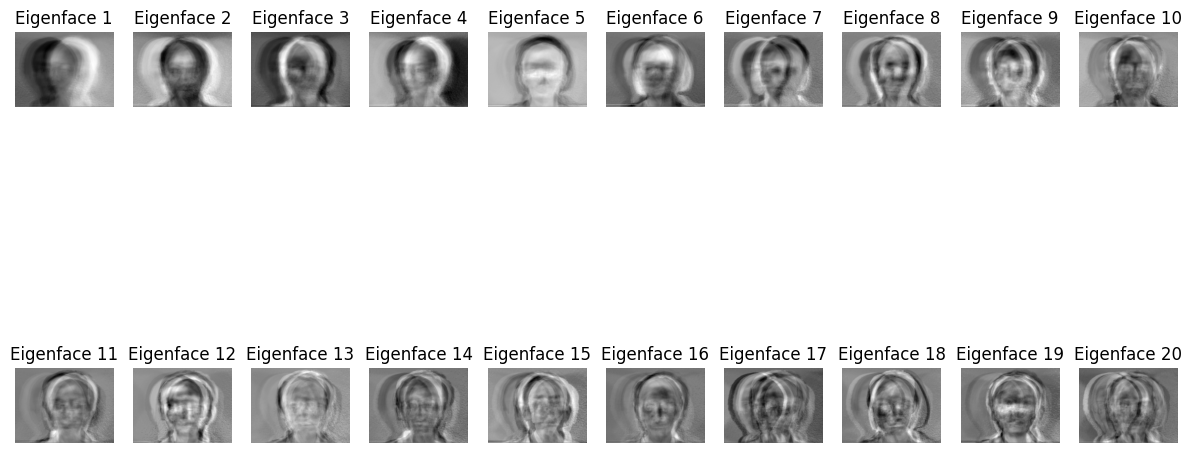

In [16]:
visualize_eigenfaces(eig_vecs, img_shape, 20)